# Random Forest Classifier in NPF Data

## Creating the dataset

In [2]:
import pandas as pd
import numpy as np

npf = pd.read_csv("npf_train.csv")
npf_test = pd.read_csv("npf_test_hidden.csv")

npf = npf.set_index("date")
npf = npf.drop("id", axis=1)
npf = npf.drop("partlybad", axis=1)

npf_test = npf_test.set_index("date")
npf_test = npf_test.drop("id", axis=1)
npf_test = npf_test.drop("partlybad", axis=1)

class2 = np.array(["nonevent", "event"])
npf["class2"] = class2[(npf["class4"]!="nonevent").astype(int)]
npf_test["class2"] = class2[(npf_test["class4"]!="nonevent").astype(int)]

npf

,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,...,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,class2
date,,,,,,,,,,,,,,,,,,,,,
2000-01-17,Ib,368.771711,0.310309,368.665658,0.305127,369.371184,0.333606,368.616053,0.302364,41.650106,...,0.250952,-0.899393,0.271648,2.492491,1.310880,0.031587,0.018122,0.000243,0.000035,event
2000-02-28,nonevent,378.197295,1.001493,378.083089,1.025472,378.671311,1.017208,378.029508,1.022258,3.478842,...,0.313460,2.033191,0.271090,0.295937,0.177836,0.005140,0.003552,0.003658,0.000940,nonevent
2000-03-24,Ib,373.043158,0.749865,372.930066,0.728411,373.569735,0.835240,372.869868,0.692828,297.954063,...,2.037111,0.780422,2.334741,14.434789,8.627312,0.353743,0.272472,0.000591,0.000191,event
2000-03-30,II,375.643019,0.558629,375.549430,0.540964,376.045849,0.580730,375.506013,0.529970,324.318386,...,2.509758,6.533544,2.695277,16.077513,9.984686,0.568242,0.451830,0.002493,0.000466,event
2000-04-04,nonevent,377.661030,0.408421,377.609576,0.423963,378.117134,0.417243,377.582242,0.424460,167.479964,...,1.438071,2.133774,1.614122,9.710422,7.054069,0.339135,0.291457,0.004715,0.000679,nonevent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-16,nonevent,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,381.072078,3.840630,121.227780,...,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425,nonevent
2011-08-19,nonevent,383.698146,8.418351,384.052632,8.130389,386.436800,9.901536,384.105592,7.952936,332.744478,...,2.868514,16.352391,3.055122,18.475262,12.838481,0.884404,0.726461,0.002476,0.000902,nonevent
2011-08-21,nonevent,379.279128,12.045785,379.363087,11.533353,381.268591,14.043508,379.163200,10.932955,114.298822,...,1.696894,15.094141,1.745526,8.099394,5.851942,0.416961,0.363890,0.003484,0.000457,nonevent


## Splitting train and test data

In [16]:
from sklearn.model_selection import train_test_split

X_train = npf.drop(["class4", "class2"], axis=1)
y_train = npf["class2"]

X_test = npf_test.drop(["class4", "class2"], axis=1)
y_test = npf_test["class2"]

## Using RandomizedSearchCV to find best hyperparameters for RandomForestClassifier

We will be tuning RandomForestClassifier parameters to achieve the highest accuracy model.
Let's choose the most common hyperparameters of RandomForestClassifier for tuning:
- n_estimators (amount of trees in the forest)
- max_features (features per split)
- max_depth (max depth of decision trees)
- min_samples_split (The min samples required to split an internal node)
- min_samples_leaf (min samples required to be a leaf)
- bootsrap (if full dataset is used for all trees)

We will be creating a range for all parameters and let RandomizedSearchCV and GridSearchCV pick the best parameters.
First we are going to try parameters randomly using RandomizedSearchCV:

In [67]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [4, 5, 6, 8]
min_samples_leaf = [2, 4, 6]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [4, 5, 6, 8],
 'min_samples_leaf': [2, 4, 6],
 'bootstrap': [True, False]}

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2000, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


{'n_estimators': 10,
 'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': True}

RandomSearchCV in the first run gave the minimum available features in most features:
´{'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'max_features': 'auto',
    'max_depth': 70,
    'bootstrap': True}´
    
so I tuned the available features down.
Most interesting features turned out to be n_estimators and max_depth. We will be narrowing down these parameters for the next step in hyperparameter optimization: Grid Search with Cross validation:

In [104]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [70, 90, 100, 110, 120, 130, 150, None],
 'min_samples_split': [8],
 'min_samples_leaf': [6],
 'bootstrap': [True]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'bootstrap': True,
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'n_estimators': 100}

From GridSearchCV we get about:

´{'bootstrap': True,
    'max_depth': None,
    'max_features': 'auto',
    'min_samples_leaf': 6,
    'min_samples_split': 8,
    'n_estimators': 100}´
    
Reading the documentation about RandomForestClassifier, we can see that many of these values are close to the default ones:

´{'bootstrap': True (default),
    'max_depth': None (default),
    'max_features': 'sqrt' (default),
    'min_samples_leaf': 6,
    'min_samples_split': 8,
    'n_estimators': 100 (default)}´
    
From this we can say that RandomForestClassifier is a very good model with even the default parameters.

Let's test if there is any difference to a default model:

In [111]:
rf_default = RandomForestClassifier()
rf_modified = RandomForestClassifier(min_samples_leaf=6, min_samples_split=8)

rf_default.fit(X_train, y_train)
rf_modified.fit(X_train, y_train)

print("default", rf_default.score(X_test, y_test))
print("modified", rf_modified.score(X_test, y_test))

default 0.43626943005181346
modified 0.43523316062176165


Now we can say that the difference is close to nothing compared to the default model. From now on we can just use the default model.

## Trying feature selection

In order to simplify our model we can cut down the amount of datapoint we use.

Let's try two methods for feature selection SelectKBest and SelectFromModel.
SelectKBest selects the k-best amount of features from our model, whereas SelectFromModel selects the best amount of features for us automatically (which is around 25-30 features).

Let's use SelectFromModel.

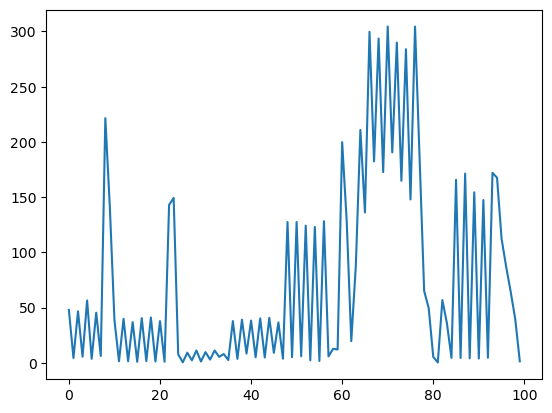

304.5287057946586


In [136]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

selector = SelectKBest(f_classif, k="all")
selector.fit_transform(X_train, y_train)
kbestscore = selector.scores_

h=plt.plot(kbestscore)
plt.show()

print(max(kbestscore))

cols = selector.get_support(indices=True)
print(len(cols))
X_new = X_train.iloc[:,cols]
X_new

In [152]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

m = SelectFromModel(RandomForestClassifier(), max_features=100)
m.fit(X_train, y_train)

columns = m.get_support(indices=True)
X_newtrain = X_train.iloc[:,columns]
X_newtest = X_test.iloc[:,columns]

X_newtrain

,CO2168.std,CO2504.std,Glob.mean,Glob.std,H2O168.mean,H2O336.mean,H2O42.mean,H2O504.mean,H2O672.mean,H2O84.mean,...,RHIRGA84.mean,SWS.mean,T168.mean,T42.mean,T504.mean,T504.std,T672.mean,T84.std,UV_A.mean,CS.mean
date,,,,,,,,,,,,,,,,,,,,,
2000-01-17,0.310309,0.302364,41.650106,29.942679,4.383158,4.358684,4.448289,4.351579,4.349342,4.422000,...,74.509200,937.880000,-0.996623,-0.899631,-1.139868,0.252046,-1.476016,0.271648,2.492491,0.000243
2000-02-28,1.001493,1.022258,3.478842,2.165706,7.233852,7.172114,7.251721,7.166230,7.121724,7.219590,...,99.240574,936.000000,1.911915,2.044877,1.789722,0.301143,1.479493,0.271090,0.295937,0.003658
2000-03-24,0.749865,0.692828,297.954063,188.348344,3.575000,3.553026,3.621523,3.540331,3.539536,3.592039,...,56.476316,923.745098,0.541530,0.815106,0.110739,2.070784,-0.270844,2.334741,14.434789,0.000591
2000-03-30,0.558629,0.529970,324.318386,193.207278,6.500566,6.512278,6.515472,6.512152,6.519430,6.512642,...,67.095220,925.622642,6.339887,6.561362,5.982673,2.531879,5.622308,2.695277,16.077513,0.002493
2000-04-04,0.408421,0.424460,167.479964,135.294894,6.223576,6.213879,6.269451,6.218667,6.223394,6.240667,...,86.864424,921.727273,1.885328,2.180546,1.535061,1.464653,1.140121,1.614122,9.710422,0.004715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-16,4.411571,3.840630,121.227780,131.474300,15.121299,15.068442,15.224194,15.026299,14.995519,15.189351,...,77.203052,915.250000,17.075372,17.323382,16.608408,1.112215,16.319361,1.308728,8.688739,0.002423
2011-08-19,8.418351,7.952936,332.744478,243.722645,10.946556,10.760329,11.328859,10.641908,10.550927,11.183046,...,62.037815,890.500000,16.469414,16.245874,16.113789,2.896880,15.820245,3.055122,18.475262,0.002476
2011-08-21,12.045785,10.932955,114.298822,99.583613,13.131946,13.056040,13.218322,13.013600,12.995638,13.185101,...,76.968926,879.032258,14.991524,15.087546,14.667092,1.719399,14.421092,1.745526,8.099394,0.003484


We can test now test the effectivity of this modified dataset by training one model with the default one and the other with the modified one:

In [149]:
rf_default = RandomForestClassifier()
rf_modified = RandomForestClassifier()

rf_default.fit(X_train, y_train)
rf_modified.fit(X_newtrain, y_train)

print("default", rf_default.score(X_test, y_test))
print("modified", rf_modified.score(X_newtest, y_test))

default 0.45181347150259066
modified 0.4466321243523316


From this we can tell that our modified model is more effective, with better score and less flexibility.

In [161]:
rf = RandomForestClassifier()
rf.fit(X_newtrain, y_train)

print("Accuracy on train data:", rf.score(X_newtrain, y_train))
print("Accuracy on test data:", rf.score(X_newtest, y_test))

Accuracy on train data: 1.0
Accuracy on test data: 0.44974093264248705


## Conclusion week 1

With testing the most influential hyperparameters we can say that none of them really made a big difference. RandomForestClassifier is very effective even with it's default parameters. From modifying the dataset, we can see that it was influential and should be done, since it also makes our model a lot less complicated and easier to iterate with. Accuracy in the training data is 100% and on the test data it is around 44-45%.

Sources:
- [RandomForestClassifier - SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Hyperparameter Tuning the Random Forest in Python - Towards Data Science](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
- [SelectFromModel - SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)
- [SelectKBest - SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)